In [99]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [100]:
from helpers import load_data

# load dataset
x, y = load_data()

In [101]:
x.shape

(50,)

In [102]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [103]:
k = 4
k_indices = build_k_indices(y, k, 10)
print(x[k_indices[1:k]])
print(x[k_indices[1:k]].shape)
len(x[k_indices[1]])*(k-1)
x_train = np.reshape(x[k_indices[1:k]],len(x[k_indices[1]])*(k-1))
x_train.shape

[[2.6237491  1.48806201 0.60474982 0.98331219 3.00231147 5.77843549
  0.47856237 1.99281183 4.8951233  0.85712473 4.39037348 3.25468638]
 [4.01181111 0.73093728 2.49756165 1.10949964 2.87612401 6.0308104
  1.61424946 3.38087384 4.76893584 4.64274839 2.11899928 3.63324875]
 [5.02131076 6.15699785 2.74993656 5.90462294 5.14749821 6.28318531
  1.74043692 1.2356871  1.36187455 4.26418602 0.35237491 5.39987312]]
(3, 12)


(36,)

In [104]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    #print("step0")
    x_test = x[k_indices[0]]
    y_test = y[k_indices[0]]
    
    x_train = np.reshape(x[k_indices[1:k]],len(x[k_indices[1]])*(k-1))
    y_train = np.reshape(y[k_indices[1:k]],len(y[k_indices[1]])*(k-1))
    
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    #print("step1")
    x_test_poly = build_poly(x_test,degree).T
    x_train_poly = build_poly(x_train,degree).T   
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    #print("step2")
    w = ridge_regression(y_train, x_train_poly, lambda_)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    #print("step3")
    loss_tr = np.sqrt(2*compute_mse(y_train,x_train_poly, w))
    loss_te = np.sqrt(2*compute_mse(y_test,x_test_poly, w))
    # ***************************************************
    #raise NotImplementedError
    return loss_tr, loss_te

In [105]:
k_indices = build_k_indices(y, 4, 1)
x_test = x[k_indices[0]]
y_test = y[k_indices[0]]

x_test_poly = build_poly(x_test,7)
print(x_test_poly.shape)


loss_tr, loss_te = cross_validation(y, x, k_indices, 4, 0, 7)
print(loss_tr, loss_te )

(8, 12)
0.2553770778317823 0.28480348742702954


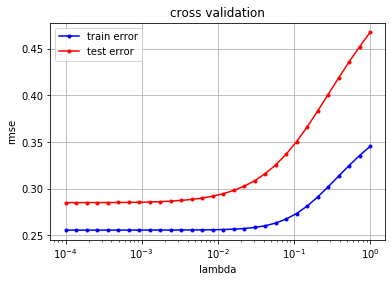

In [106]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = np.zeros(len(lambdas))
    rmse_te = np.zeros(len(lambdas))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    for i in range(0, len(lambdas)):
        rmse_tr[i], rmse_te[i] = cross_validation(y, x, k_indices, k_fold, lambdas[i], degree)
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

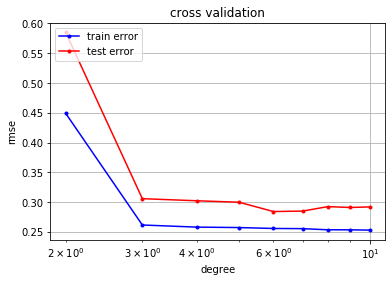

In [109]:
def cross_validation_visualization_degrees(degrees, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(degrees, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(degrees, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("degree")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

def cross_validation_demo_degrees():
    seed = 1
    degree = np.arange(2,11)
    k_fold = 4
    lambda_ = 0;
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = np.zeros(len(degree))
    rmse_te = np.zeros(len(degree))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    for i in range(0, len(degree)):
        rmse_tr[i], rmse_te[i] = cross_validation(y, x, k_indices, k_fold, lambda_, degree[i])
    # ***************************************************    
    cross_validation_visualization_degrees(degree, rmse_tr, rmse_te)

cross_validation_demo_degrees()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()